# Imports

In [1]:
from numpy.random import seed
seed(888)
from tensorflow import set_random_seed
set_random_seed(404)

In [132]:
import os
import numpy as np
import tensorflow as tf
import itertools

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [123]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS*COLOR_CHANNELS

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

NR_CLASSES = 10

# Get the Data

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [5]:
type(cifar10)
type(x_train_all)

numpy.ndarray

# Explore the Data

In [6]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

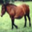

In [7]:
pic = array_to_img(x_train_all[7])
display(pic)

In [8]:
y_train_all.shape

(50000, 1)

In [9]:
y_train_all[7][0]

7

In [10]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

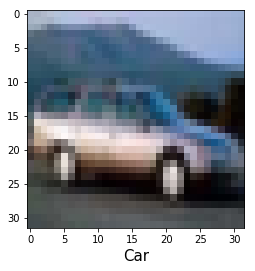

In [11]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.show()

**Challenge** Write a for loop to display the first 10 images from the ```x_train_all``` array in a row. Show the name of the label below the picture. Remove the ugly tick marks. *Hint* use matplotlib

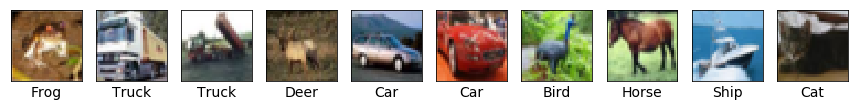

In [12]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])

In [13]:
x_train_all[0].shape

(32, 32, 3)

In [14]:
nr_images, x, y, c = x_train_all.shape
print(f'images = {nr_images} \t | width = {x} \t| height')

images = 50000 	 | width = 32 	| height


In [15]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [19]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [21]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [24]:
x_train_all[0][0][0][0]

0.23137254901960785

In [26]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [27]:
x_train_all.shape

(50000, 3072)

In [28]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


### Create Validation Dataset

In [30]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

**Challenge:** Create two numpy arrays ```x_train``` and ```y_train``` that have the shape (40000, 3072) and (40000, 1) respectively. They need to contain the last 40000 values from ```x_train_all``` and ```y_train_all``` respectively.

In [31]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

### Create a small dataset (for illustration)

In [34]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the Neural Network using Keras

In [81]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_output')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [82]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

**Challenge:** Create a third model,```model_3``` that has two dropout layers. The second dropout layer should be added after the first hidden layer and have a dropout rate of 25%

In [83]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(16, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [42]:
type(model_1)

keras.engine.sequential.Sequential

In [75]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [44]:
32*32*3*128 + 128 + (128*64 + 64) + (64*16 + 16) + (16*10 + 10) 

402810

# Tensorboard (visualising learning)

In [56]:
def get_tensorboard(model_name):
    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

# Fit the Model

In [59]:
samples_per_batch = 1000

In [69]:
# %%time
# nr_epochs = 150
# model_1.fit(
#     x_train_xs,
#     y_train_xs,
#     batch_size=samples_per_batch,
#     epochs=nr_epochs
#     ,callbacks=[get_tensorboard('Model 1')],
#     verbose=0,
#     validation_data=(x_val, y_val)
# )

Successfully created directory
CPU times: user 1min 5s, sys: 11.8 s, total: 1min 17s
Wall time: 25.6 s


In [74]:
# %%time
# nr_epochs = 150
# model_2.fit(
#     x_train_xs,
#     y_train_xs,
#     batch_size=samples_per_batch,
#     epochs=nr_epochs
#     ,callbacks=[get_tensorboard('Model 2')],
#     verbose=0,
#     validation_data=(x_val, y_val)
# )

Successfully created directory
CPU times: user 1min 9s, sys: 29.6 s, total: 1min 39s
Wall time: 29.7 s


In [80]:
# %%time
# nr_epochs = 150
# model_3.fit(
#     x_train_xs,
#     y_train_xs,
#     batch_size=samples_per_batch,
#     epochs=nr_epochs
#     ,callbacks=[get_tensorboard('Model 3')],
#     verbose=0,
#     validation_data=(x_val, y_val)
# )

Successfully created directory
CPU times: user 1min 10s, sys: 30.3 s, total: 1min 40s
Wall time: 30.3 s


In [84]:
%%time
nr_epochs = 100
model_1.fit(
    x_train,
    y_train,
    batch_size=samples_per_batch,
    epochs=nr_epochs
    ,callbacks=[get_tensorboard('Model 1 XL')],
    verbose=0,
    validation_data=(x_val, y_val)
)

Successfully created directory
CPU times: user 6min 24s, sys: 2min 32s, total: 8min 57s
Wall time: 2min 30s


In [85]:
%%time
nr_epochs = 100
model_2.fit(
    x_train,
    y_train,
    batch_size=samples_per_batch,
    epochs=nr_epochs
    ,callbacks=[get_tensorboard('Model 2 XL')],
    verbose=0,
    validation_data=(x_val, y_val)
)

Successfully created directory
CPU times: user 12min 17s, sys: 3min 18s, total: 15min 36s
Wall time: 3min 15s


In [86]:
%%time
nr_epochs = 100
model_3.fit(
    x_train,
    y_train,
    batch_size=samples_per_batch,
    epochs=nr_epochs
    ,callbacks=[get_tensorboard('Model 3 XL')],
    verbose=0,
    validation_data=(x_val, y_val)
)

Successfully created directory
CPU times: user 12min 24s, sys: 6min 27s, total: 18min 51s
Wall time: 3min 36s


# Predictions on Individual Images

In [89]:
x_val[0].shape

(3072,)

In [90]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [93]:
np.set_printoptions(precision=3)

In [96]:
model_2.predict(test)

array([[0.015, 0.002, 0.134, 0.159, 0.095, 0.193, 0.363, 0.036, 0.001,
        0.001]], dtype=float32)

In [98]:
model_2.predict(x_val).shape

(10000, 10)

In [99]:
model_2.predict_classes(test)

array([6])

In [100]:
y_val[0]

array([6], dtype=uint8)

**Challenge:** Write a for loop where you print out the actual value and the predicted value for the first 10 images in the valuation dataset.

In [103]:
for number in range(10):
    test_img = np.expand_dims(x_val[number], axis=0)
    predicted_val = model_2.predict_classes(test_img)[0]
    print(f'Actual value: {y_val[number][0]} vs. predicted: {predicted_val}')

Actual value: 6 vs. predicted: 6
Actual value: 9 vs. predicted: 1
Actual value: 9 vs. predicted: 9
Actual value: 4 vs. predicted: 6
Actual value: 1 vs. predicted: 1
Actual value: 1 vs. predicted: 9
Actual value: 2 vs. predicted: 2
Actual value: 7 vs. predicted: 7
Actual value: 8 vs. predicted: 8
Actual value: 3 vs. predicted: 9


# Evaluation

In [104]:
model_2.metrics_names

['loss', 'acc']

In [106]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss} and test accuracy is {test_accuracy:0.1%}')

10000/10000 [==============================] - 0s 29us/step
Test loss is 1.4066888290405273 and test accuracy is 49.9%


### Confusion Matrix

In [109]:
predictions = model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [110]:
conf_matrix.shape

(10, 10)

In [111]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [112]:
conf_matrix.max()

688

In [113]:
conf_matrix.min()

6

In [135]:
conf_matrix[0]

array([575,  25,  58,  25,  37,  17,  30,  21, 171,  41])

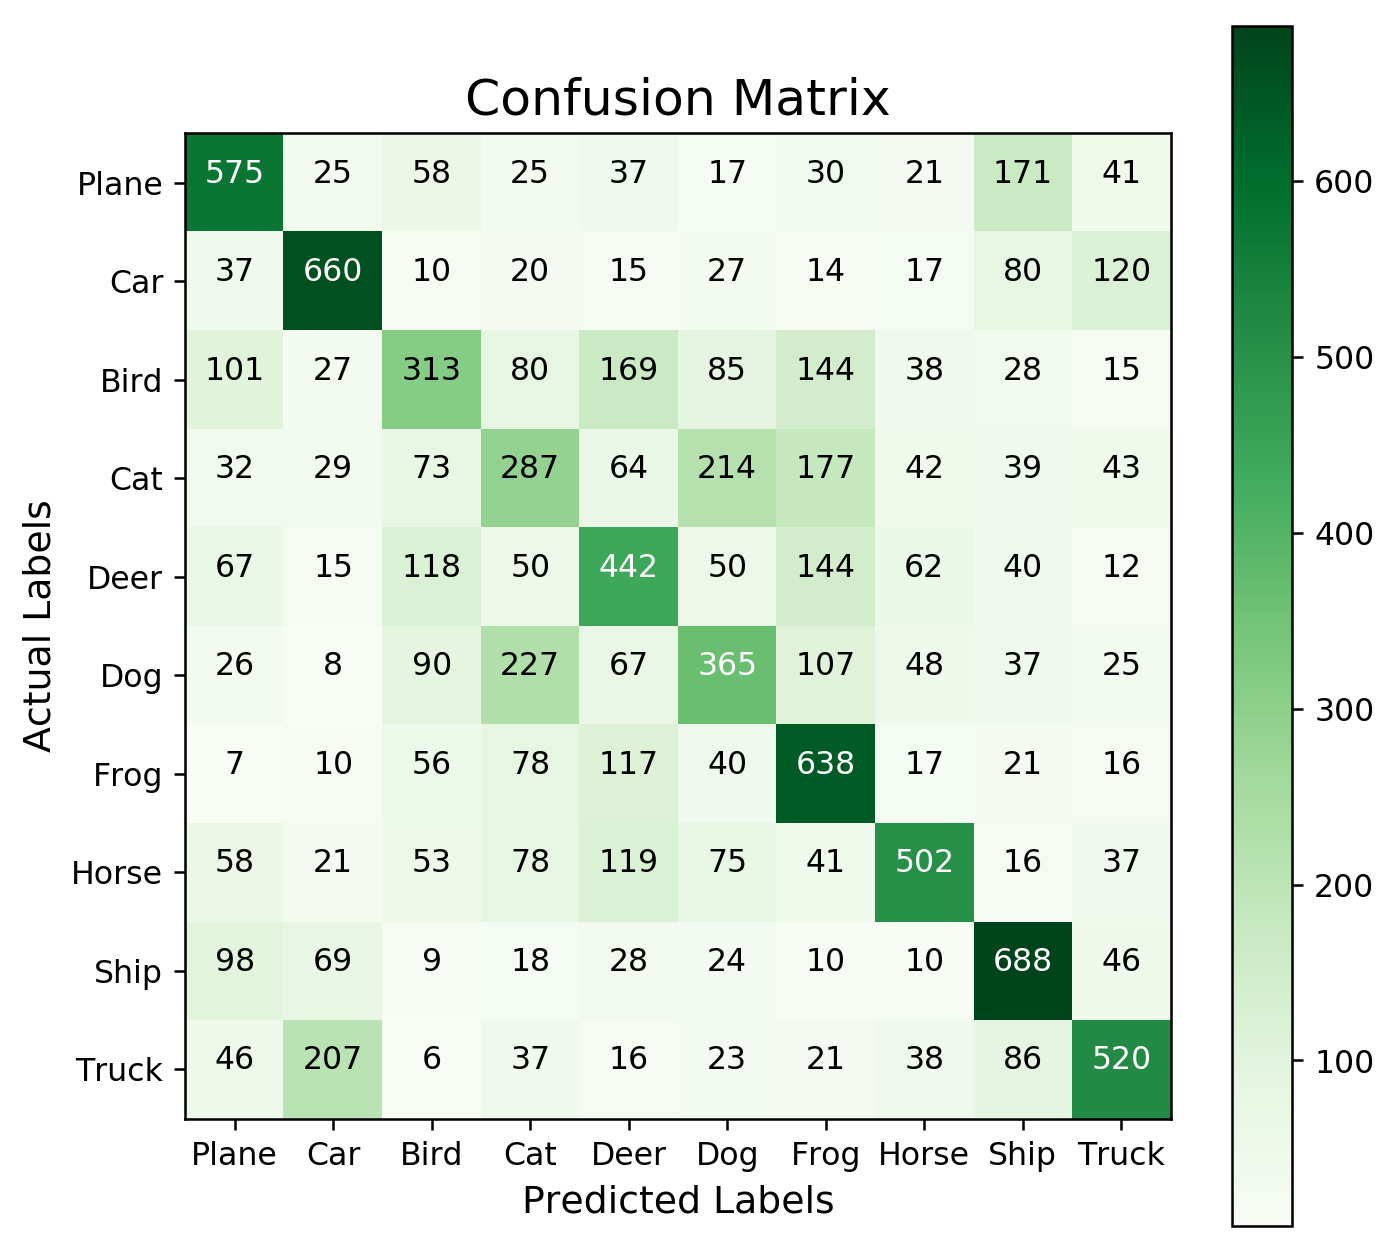

In [143]:
plt.figure(figsize=(7,7), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(
        j, i, conf_matrix[i,j], horizontalalignment='center',
        color='white' if conf_matrix[i,j] > conf_matrix.max()/2 else 'black'
    )
    
plt.show()

**Challenge:** What do the numbers down the diagonal represent? What do the other numbers (excluding the number in the diagonal) in a single row represent? Try to identify the false positives, false negatives, and the true positives in the confusion matrix.

In [144]:
# True Positives
np.diag(conf_matrix)

array([575, 660, 313, 287, 442, 365, 638, 502, 688, 520])

In [145]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.575, 0.66 , 0.313, 0.287, 0.442, 0.365, 0.638, 0.502, 0.688,
       0.52 ])

In [146]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.549, 0.616, 0.398, 0.319, 0.412, 0.397, 0.481, 0.631, 0.57 ,
       0.594])

In [147]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 49.90%


**Challenge:** Calculate the average precision for the model as a whole. Print this out. Then calculate the f-score for the model as a whole

In [148]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 f score is {f1_score:.2%}')

Model 2 precision score is 49.68%
Model 2 f score is 49.79%
